# Simple EDA 

This is a simple $exploratory\ data\ analysis$ of special promotion of a product. The marketing campaign was implemented via $questionnaire$ form for users on the Internet. However, owners decided to conduct that in two forms, the first one is a ordynary survey where users have to put their answers ($control$), while the second has a spectacular interaction with people rather than merely survey ($exposed$). The results are provided in dataset form, i want to implement a simple analysis of it

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
df=pd.read_csv('../Денис/dataset/AdSmartABdata.csv',parse_dates=['date'])

In [3]:
print(df.shape)
df['day']=df['date'].dt.day
df.head()

(8077, 9)


,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no,day
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0,10
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0,7
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1,5
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0,3
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0,3


#### So as we see dataset has 8k observations and 9 features. 

$Auction\ id$ - unique user id\
$Experiment$ - whether exposed or control group\
$Device$ - a particular model of device from which user pass the survey\
$Platform\ os$ - a particular operatonal system\
$Browser$ - a specific browser\
$Yes\ and\ No$- if the user chooses the “Yes” or "No" radio button for the BIO questionnaire. 


### 1. Step
Before doing analysis, lets figure out whether the dataset has NaN values

In [4]:
df['platform_os']=df['platform_os'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   auction_id   8077 non-null   object        
 1   experiment   8077 non-null   object        
 2   date         8077 non-null   datetime64[ns]
 3   hour         8077 non-null   int64         
 4   device_make  8077 non-null   object        
 5   platform_os  8077 non-null   object        
 6   browser      8077 non-null   object        
 7   yes          8077 non-null   int64         
 8   no           8077 non-null   int64         
 9   day          8077 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 631.1+ KB


Fortunatelly, it does not

### 2. Step
Now lets define the mean number of people who agreed to pass a questionnaire from both control and exposed group

In [5]:
c_mean,e_mean=df[df['experiment']=='control']['yes'].mean()*100,df[df['experiment']=='exposed']['yes'].mean()*100
print(round(c_mean,2),'% is mean of control group and',round(e_mean,2),'% is mean of exposed group')

6.48 % is mean of control group and 7.69 % is mean of exposed group


Well, seems that interaction ad works better. Lets consider the dataset from various points of view, but we should define how many values our categorical variables have and if the number is large enough, we should shortage them

In [268]:
df['device_make'].value_counts()

Generic Smartphone    4743
iPhone                 433
Samsung SM-G960F       203
Samsung SM-G973F       154
Samsung SM-G950F       148
                      ... 
Lenovo P2a42             1
Lenovo A7020a48          1
Samsung GT-I9195I        1
MHA-L09                  1
Samsung SM-A015M         1
Name: device_make, Length: 269, dtype: int64

In [269]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Opera Mobile                     3
Pinterest                        3
Chrome                           3
Edge Mobile                      1
Firefox Mobile                   1
Puffin                           1
Android                          1
Opera Mini                       1
Name: browser, dtype: int64

Unfortunatelly, we have an enormous number of values, for simplicity we should remain only the most popular ones

In [6]:
ee=df['device_make'].value_counts()
ww=ee[ee<200].index
df['device_make']=df['device_make'].apply(lambda w:'Other' if w in ww else w)

In [7]:
ee=df['browser'].value_counts()
ww=ee[ee<1000].index
df['browser']=df['browser'].apply(lambda w:'Other' if w in ww else w)

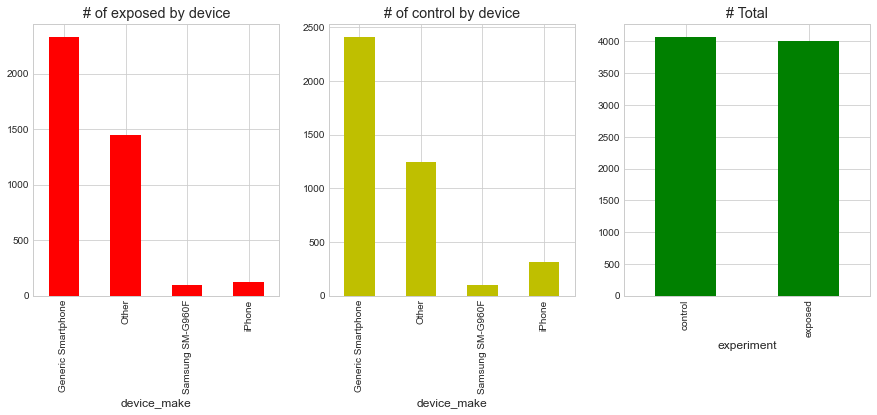

In [281]:
_,ax=plt.subplots(1,3,figsize=(15,5))
df[df['experiment']=='exposed'].groupby('device_make')['auction_id'].nunique()\
                                            .plot(kind='bar',color='r',ax=ax[0],title='# of exposed by device')

df[df['experiment']=='control'].groupby('device_make')['auction_id'].nunique()\
                                            .plot(kind='bar',color='y',ax=ax[1],title='# of control by device')

df.groupby('experiment')['auction_id'].nunique()\
                                            .plot(kind='bar',color='g',ax=ax[2],title='# Total');

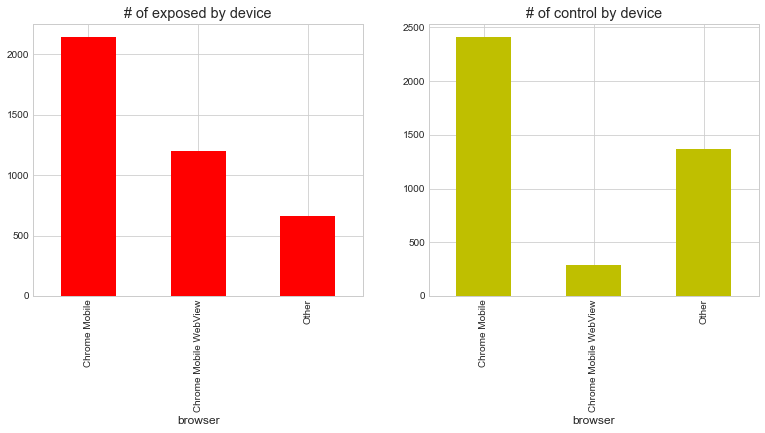

In [275]:
_,ax=plt.subplots(1,2,figsize=(13,5))
df[df['experiment']=='exposed'].groupby('browser')['auction_id'].nunique()\
                                            .plot(kind='bar',color='r',ax=ax[0],title='# of exposed by device')

df[df['experiment']=='control'].groupby('browser')['auction_id'].nunique()\
                                            .plot(kind='bar',color='y',ax=ax[1],title='# of control by device');


As we can see in both groups the prevalent share of users employed a $Generic \ Smartphone$\
And most of them used $Chrome\ Mobile\ Browser$\
Now lets consider the division clicks by $date\ and \ hours$

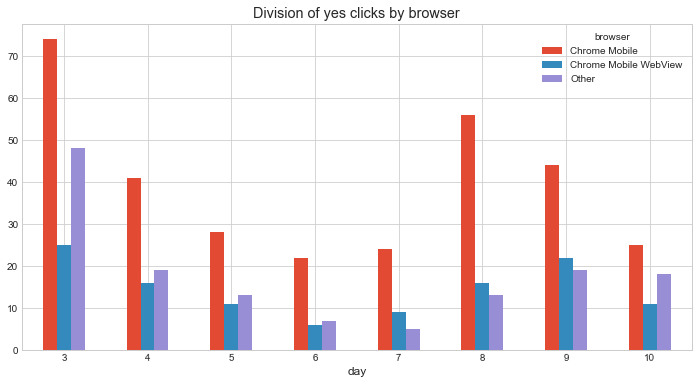

In [233]:
datebrw=df[df['yes']==1].groupby(['day','browser'])['yes'].count()
datebrw1=pd.DataFrame(datebrw.unstack(level=1))
datebrw1.plot(kind='bar',figsize=(12,6),title=('Division of yes clicks by browser'))
plt.xticks(rotation=2);

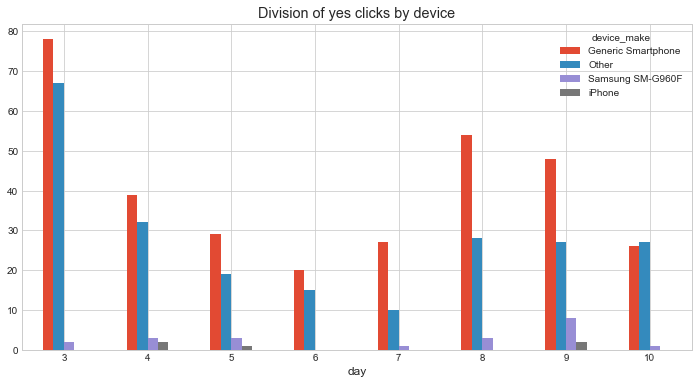

In [282]:
datedev=df[df['yes']==1].groupby(['day','device_make'])['yes'].count()
datedev1=pd.DataFrame(datedev.unstack(level=1))
datedev1.plot(kind='bar',figsize=(12,6),title=('Division of yes clicks by device'))
plt.xticks(rotation=2);

So, throghout all time Generic SM and Google Mobile browser have a leadership in terms of usage (except for  $10th \ Jule$, Other models are prevalent)

## 3. Step
Lets consider the change of conversion rate of users who clicked yes on survey by hours and date

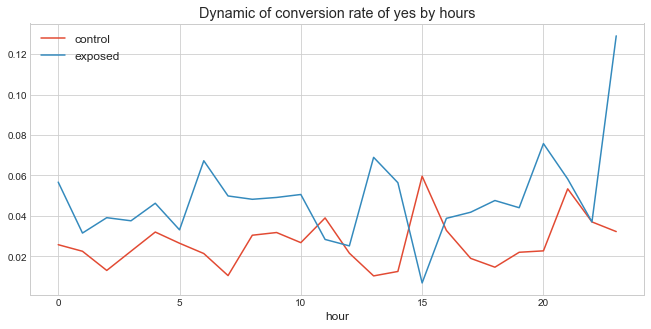

In [257]:
totale=df[(df['yes']==1)&(df['experiment']=='control')].groupby('hour')['yes']\
                                    .count()/df.groupby('hour')['yes'].count()
totale_1=pd.DataFrame(totale.reset_index(0))
totalc=df[(df['yes']==1)&(df['experiment']=='exposed')].groupby('hour')['yes']\
                                    .count()/df.groupby('hour')['yes'].count()
totalc_1=pd.DataFrame(totalc.reset_index(0))
ax=totale_1.plot('hour','yes',label='control',figsize=(11,5))
totalc_1.plot('hour','yes',label='exposed',ax=ax)
plt.title('Dynamic of conversion rate of yes by hours')
plt.legend(fontsize='large');

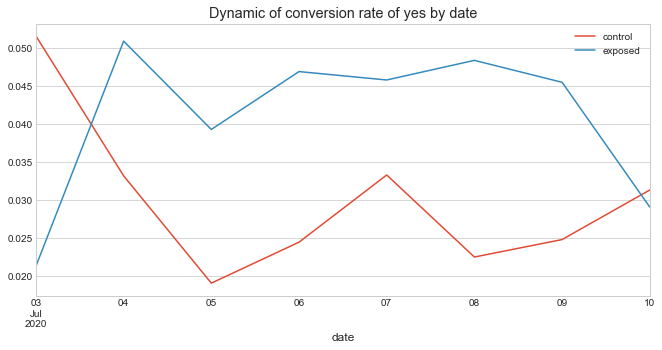

In [284]:
totaledate=df[(df['yes']==1)&(df['experiment']=='control')].groupby('date')['yes']\
                                    .count()/df.groupby('date')['yes'].count()
totaledate_1=pd.DataFrame(totaledate.reset_index(0))
totalcdate=df[(df['yes']==1)&(df['experiment']=='exposed')].groupby('date')['yes']\
                                    .count()/df.groupby('date')['yes'].count()
totalcdate_1=pd.DataFrame(totalcdate.reset_index(0))
ax=totaledate_1.plot('date','yes',label='control',figsize=(11,5))
totalcdate_1.plot('date','yes',label='exposed',ax=ax)
plt.title('Dynamic of conversion rate of yes by date');

The conversion rate is prevalent on both hours and dates, seems interaction format works indeed better

## 4. Step
However, we need to be sure that our assumption is true, we are able to prove it through conducting a statistical test, in order to check our hypothesis that interaction format contributes to pass the survey
$$
\begin{aligned}
&H_0: \hspace{2mm} p_0 = p_a \\
&H_1: \hspace{2mm} p_0 < p_a  
\end{aligned}
$$

$Assumptions$: 
1. Our observations are $indepedent$ 
2. The sample is $large$ 

So we can apply $chi2 \ test$

In [11]:

table=pd.crosstab(df['experiment'],df['yes'],normalize=False)
table

yes,0,1
experiment,,
control,3807,264
exposed,3698,308


In [15]:
from scipy import stats
stat = stats.chi2_contingency(table)
if stat[1] > 0.05:
    print('p-value =',stat[1],'\nchi stat = ',stat[0],'\nнет значимой разницы')
else:
    print('p-value =',stat[1],'\nchi stat = ',stat[0],'\nесть значимая разница')

p-value = 0.03893119708315394 
chi stat =  4.263867257547753 
есть значимая разница


# Conclusion:
Despite the fact that all graphs showed a raise of clicks of interaction format, statistical test indicates that it is  true, therefore, $there \ is \ difference \ between$ types of survey